In [43]:
%load_ext autoreload
%autoreload 2
from utils import Metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
with open("metrics.pkl", "rb") as f:
    metrics_list = pickle.load(f)

In [19]:
cranfield_metrics, time_metrics = metrics_list[:12], metrics_list[12:]

In [29]:
list(map(lambda x: f"{cranfield_metrics[0].rps[x]:.3f}", ["mean", "min", "first_quartile", "median", "third_quartile", "max"]))

['0.104', '0.000', '0.000', '0.000', '0.143', '1.000']

In [37]:
for i,m in enumerate(cranfield_metrics):
    keys = ["mean", "min", "first_quartile", "median", "third_quartile", "max"]
    strings = list(map(lambda x: f"{m.rps[x]:.3f}", keys))
    strings += list(map(lambda x: f"{time_metrics[i].rps[x]:.3f}", keys))
    print(str(m) + " & " + " & ".join(strings) + "\\\\")

stemming-bm25f(0.8,1.9) & 0.104 & 0.000 & 0.000 & 0.000 & 0.143 & 1.000 & 0.302 & 0.000 & 0.000 & 0.125 & 0.500 & 1.000\\
stemming-bm25f(0.8,1.5) & 0.104 & 0.000 & 0.000 & 0.000 & 0.143 & 1.000 & 0.292 & 0.000 & 0.000 & 0.125 & 0.500 & 1.000\\
stemming-bm25f(0.7,1.7) & 0.089 & 0.000 & 0.000 & 0.000 & 0.143 & 0.667 & 0.298 & 0.000 & 0.000 & 0.146 & 0.500 & 1.000\\
stemming-bm25f(0.9,1.5) & 0.097 & 0.000 & 0.000 & 0.000 & 0.135 & 1.000 & 0.298 & 0.000 & 0.000 & 0.125 & 0.500 & 1.000\\
stemming-bm25f(0.8,1.2) & 0.093 & 0.000 & 0.000 & 0.000 & 0.143 & 1.000 & 0.294 & 0.000 & 0.000 & 0.125 & 0.500 & 1.000\\
stemming-bm25f(0.9,1.2) & 0.098 & 0.000 & 0.000 & 0.000 & 0.143 & 1.000 & 0.290 & 0.000 & 0.000 & 0.125 & 0.500 & 1.000\\
stemming-bm25f(0.3,1.2) & 0.082 & 0.000 & 0.000 & 0.000 & 0.135 & 0.667 & 0.309 & 0.000 & 0.000 & 0.183 & 0.500 & 1.000\\
stemming-bm25f(0.4,1.7) & 0.087 & 0.000 & 0.000 & 0.000 & 0.135 & 0.667 & 0.320 & 0.000 & 0.000 & 0.200 & 0.500 & 1.000\\
stemming-bm25f(0.75,1.2)

In [123]:
sorted_time = sorted(time_metrics, key=lambda x: x.MRR, reverse=True)
[x.MRR for x in sorted_time]

[0.7101190476190476,
 0.7096279761904762,
 0.6933829365079365,
 0.6820238095238096,
 0.67875,
 0.6775,
 0.6775,
 0.67,
 0.6676041666666667,
 0.666875,
 0.6655208333333336,
 0.6655208333333335]

In [122]:
sorted_cranfield = sorted(cranfield_metrics, key=lambda x: x.MRR, reverse=True)
[x.MRR for x in sorted_cranfield]

[0.45792207792207806,
 0.4560425685425687,
 0.4546897546897547,
 0.44881673881673884,
 0.4460389610389612,
 0.4454365079365081,
 0.4413455988455989,
 0.44036796536796546,
 0.4370887445887447,
 0.4207828282828284,
 0.4200360750360752,
 0.4125036075036077]

In [183]:
def dataframe_from_metrics(metrics_list):
    top5_metrics = metrics_list[:5]
    k_vals = [1, 3, 5, 10]

    metrics_str = []
    precisions = []
    ncdg = []

    for m in top5_metrics:
        metrics_str += [str(m)]*4
        precisions += m.rp_at_k
        ncdg += m.ndcg_at_k

    df = pd.DataFrame.from_dict({'k': k_vals*5,
                       'metric': metrics_str,
                       'precision': precisions,
                        'ncdg': ncdg})
    
    return df

In [184]:
cranfield_df = dataframe_from_metrics(sorted_cranfield)
time_df = dataframe_from_metrics(sorted_time)

In [185]:
def plot_df(df, ax, ylab, title, legend_title="Preprocess-scoring", save=True):
    plt.figure(figsize=(10,8))
    scatter = sns.scatterplot(data=df, ax=ax, x="k", y=ylab, hue="metric", alpha=0.5, s=150)
#     plt.xlabel("k", fontsize=20)
#     plt.ylabel(ylab, fontsize=20)
#     ax.set_title(title, fontsize=15)
    sns_plot = scatter.legend(title=legend_title)

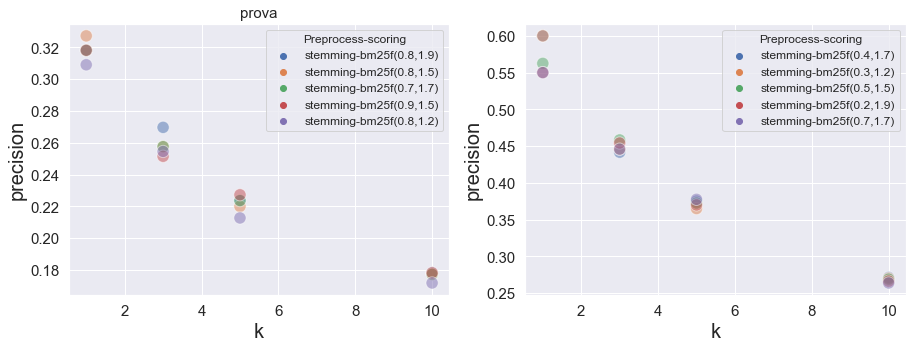

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [202]:
LARGE_SIZE = 20
MEDIUM_SIZE = 15
SMALL_SIZE = 12

plt.rc('axes', labelsize=LARGE_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_df(cranfield_df, ax=axes[0], ylab="precision", title="Precision @ k for Cranfield dataset")
plot_df(time_df, ax=axes[1], ylab="precision", title="Precision @ k for Time dataset")
axes[0].set_title("prova", fontsize="Cranfield")
# plot_df(cranfield_df, ax=axes[0,1], ylab="ncdg", title="NCDG @ k for Cranfield dataset")
# plot_df(time_df, ax=axes[1,1], ylab="ncdg", title="NCDG @ k for Time dataset")
fig.savefig("p@k.png")

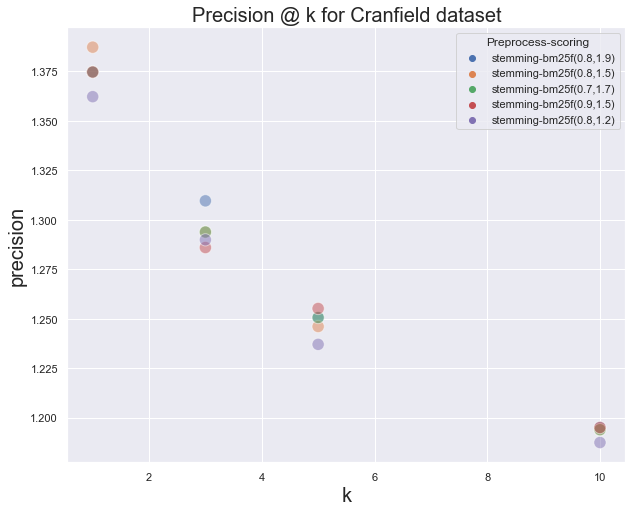

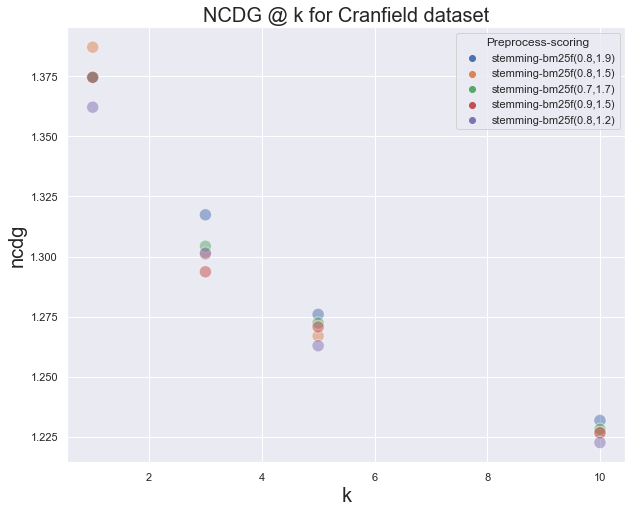

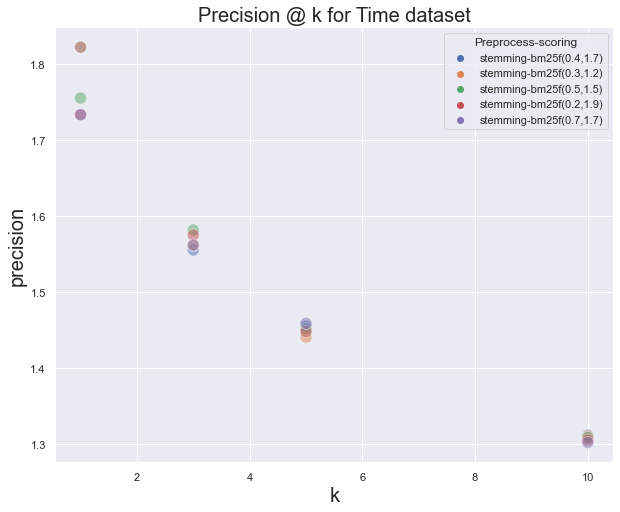

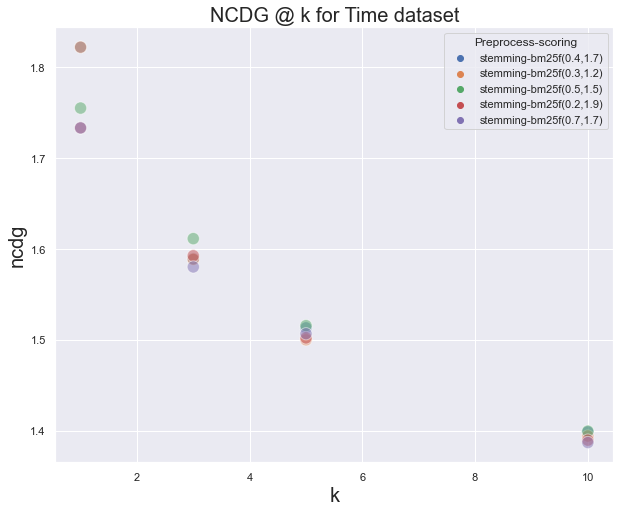

In [130]:
rp_records = [[str(x), x.rps['mean'], x.rps['min'], x.rps['first_quartile']] for x in metrics_list]

In [127]:
pd.DataFrame(rp_records, columns=["Configuration", "Mean", "Min", "1st Quartile"])

,Configuration,Mean,Min,1st Quartile
0,"stemming-bm25f(0.8,1.9)",0.345956,0.0,0.139163
1,"stemming-bm25f(0.8,1.5)",0.344740,0.0,0.128233
2,"stemming-bm25f(0.7,1.7)",0.346508,0.0,0.142857
3,"stemming-bm25f(0.9,1.5)",0.346317,0.0,0.108836
4,"stemming-bm25f(0.8,1.2)",0.335336,0.0,0.108836
5,"stemming-bm25f(0.9,1.2)",0.342522,0.0,0.100862
6,"stemming-bm25f(0.3,1.2)",0.331277,0.0,0.054741
7,"stemming-bm25f(0.4,1.7)",0.330632,0.0,0.069581
8,"stemming-bm25f(0.75,1.2)",0.332785,0.0,0.108836
9,"stemming-bm25f(0.5,1.5)",0.331823,0.0,0.069581
